# Level 5
This notebooks explains the process of obtaining the prior mean and variance estimates for Level 5. It also shows how to generate the figures included in the manuscript.

In [40]:
# Imports
import numpy as np
from bayesian_agent import BayesianReplica
from estimate_agent import estimate_agent, find_mu
import pandas as pd
from concat_mean import concat_mean
from data_gen_meanPrior import data_gen_meanPrior
from data_gen_varPrior import data_gen_varPrior
from concat_var_mle import concat_var_mle
import matplotlib.pyplot as plt
import os
from scipy import stats

# Imports for ease of visualization
import warnings
import matplotlib as mpl
warnings.filterwarnings("ignore")
from matplotlib.ticker import MaxNLocator
from scipy.stats import gaussian_kde
from matplotlib.patches import Patch
import seaborn as sns

# Parameters for plotting
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", palette="colorblind", font_scale=1.5, rc=custom_params)

In [6]:
#data_gen_meanPrior()

In [7]:
file_list = ['26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36', '37', '38', '39', '40', '41']
file_list_temp = ['58', '59', '60', '61', '62', '63']
# 0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000
#These are the files for mu


In [8]:
data_dir = "../data"
experiment_name = "level_5"
source_of_data = "website_training_output"

folder_exp_data = os.path.join(
    data_dir,
    experiment_name,
    source_of_data,
)

for file_id in file_list_temp:
    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    mean = find_mu(file)
    # data_gen_varPrior(mean, out_path=f'var_mean_exp5_data_{file_id}.csv')

In [9]:
file_list_2 = ['42', '43', '44', '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55', '56', '57']
file_list_2_temp = ['64', '65', '66', '67', '68', '69']
trials = [0,2, 5, 10, 20, 40, 60, 80, 100, 200, 400, 600, 800, 1000, 1500, 2000, 4000, 6000, 8000, 10000, 15000, 20000]

mu_list = []
sigma_list = []
internal_std_list = []
for i in range(len(file_list_2)):
    file = f'{folder_exp_data}/experiment_results ({file_list[i]}).csv'
    mean = find_mu(file)
    file_id = file_list_2[i]
    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    data = concat_var_mle(file)
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mean)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)

for i in range(len(file_list_2_temp)):
    file_id = file_list_temp[i]
    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    mean = find_mu(file)
    file_id = file_list_2_temp[i]
    file = f'{folder_exp_data}/experiment_results ({file_id}).csv'
    data = concat_var_mle(file)
    mu_prior, sigma_prior_mle, sigma_internal_mle = estimate_agent(data, mean)
    mu_list.append(mu_prior)
    sigma_list.append(sigma_prior_mle)
    internal_std_list.append(sigma_internal_mle)


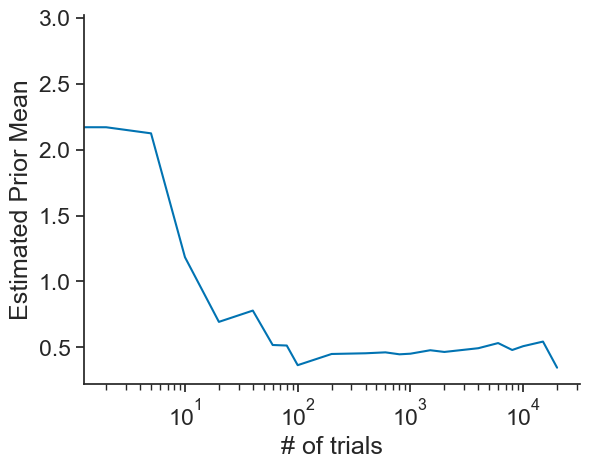

In [10]:
plt.plot(trials, mu_list)
plt.xscale('log')
plt.xlabel('# of trials')
plt.ylabel('Estimated Prior Mean')
#plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(False)
plt.show()

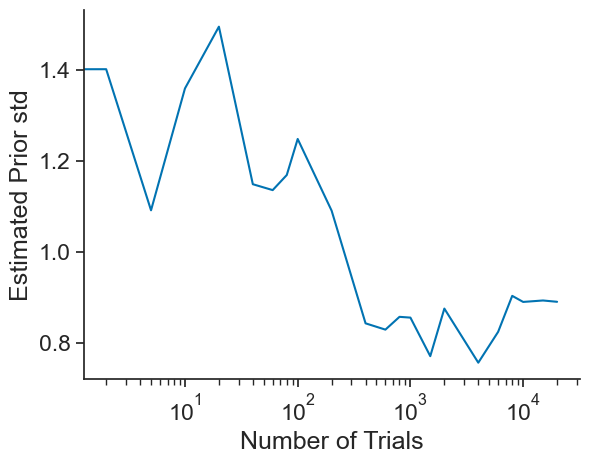

In [11]:

plt.plot(trials, sigma_list)
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior std')
#plt.title('Estimated Prior Standard Deviation vs Number of Trials')
plt.grid(False)
plt.show()

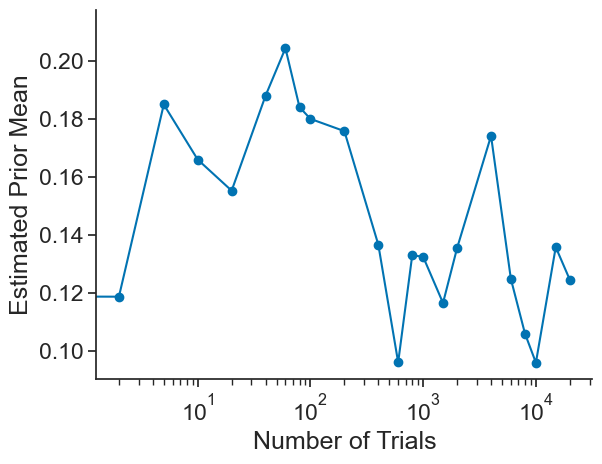

In [12]:
plt.plot(trials, internal_std_list, marker='o')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
#plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(False)
plt.show()

In [13]:
# def mse(mu_list, mu_list_agent):
#     mu_array = np.array(mu_list[:len(mu_list_agent)])  # match lengths
#     agent_array = np.array(mu_list_agent)
#     return np.mean((mu_array - agent_array) ** 2)

# def simulate_agent(mu_final, sigma_final, mu_init, sigma_init, internal_std, measurement_noise):
#     agent = BayesianReplica(mu_init, sigma_init, internal_std)
#     mu_list_agent = []
    
#     for n_trials in trials:
#         mu_prior, sigma_prior = agent.get_prior()
#         mu_list_agent.append(mu_prior)
#         agent.reset_agent()
#         agent.train_agent_kalmann_m_noise_z_var(n_trials, mu_final, sigma_final, measurement_noise)
    
#     return mu_list_agent

# from scipy.optimize import minimize_scalar

# def objective(noise):
    
#     mse_total = 0
#     for _ in range(10):
#         mu_list_agent = simulate_agent(0.48, 0.87, 2.89, 1.136, 0.15, noise)
#         mse_value = mse(mu_list, mu_list_agent)
#         mse_total += mse_value
#     mse_avg = mse_total / 10
#     return mse_avg

# res = minimize_scalar(objective, bounds=(0.1, 10.0), method='bounded')
# best_noise = res.x
# print("Best measurement noise:", best_noise)


In [14]:
# def estimate_noise():
#     res = minimize_scalar(
#         objective,
#         bounds=(1.0, 3.0),
#         method='bounded'
#     )
#     return res.x

# n_boot = 100         # 200–500 is usually enough
# noise_boot = np.zeros(n_boot)

# for b in range(n_boot):
#     noise_boot[b] = estimate_noise()


# alpha = 0.05

# ci_low = np.percentile(noise_boot, 100 * alpha / 2)
# ci_high = np.percentile(noise_boot, 100 * (1 - alpha / 2))

# print(f"Measurement noise estimate: {best_noise:.4f}")
# print(f"95% bootstrap CI: [{ci_low:.4f}, {ci_high:.4f}]")

Finding the mean after N trials

In [15]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_kalmann = mu_list_agent
sigma_list_kalmann = sigma_list_agent
    


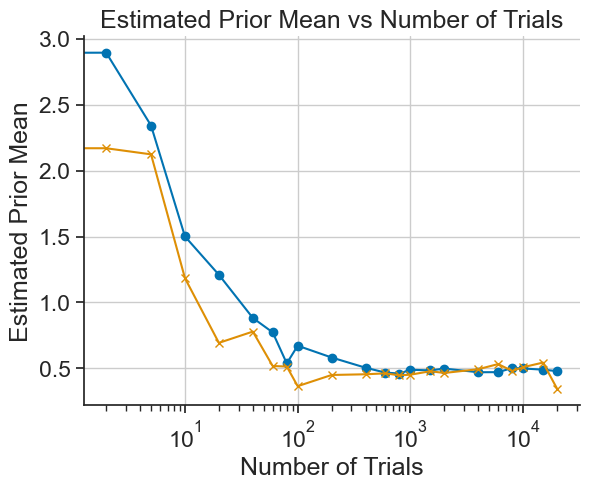

In [16]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

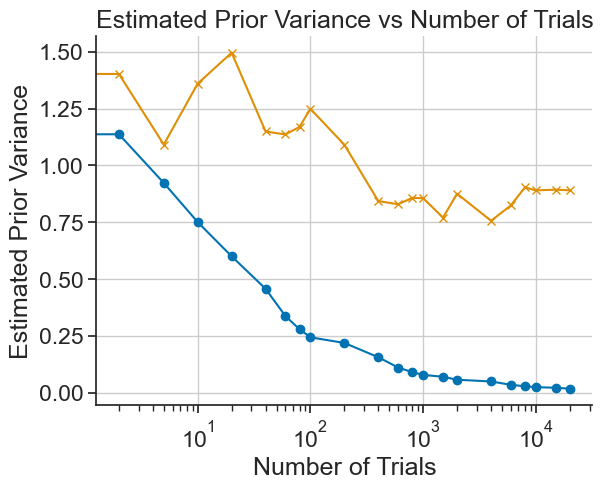

In [17]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [18]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_EKF_sq_residuals(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_EKF_sq_only = mu_list_agent
sigma_list_EKF_sq_only = sigma_list_agent

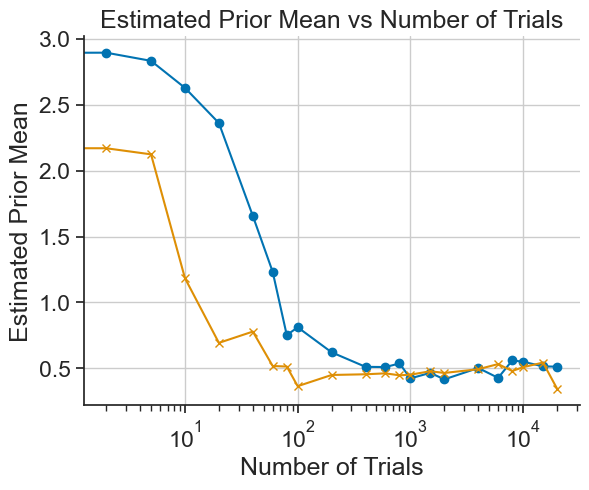

In [19]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

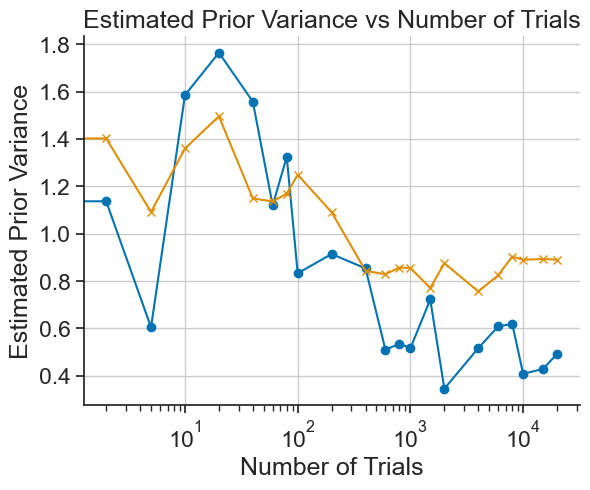

In [20]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [21]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise_pure_mean(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_sq_residuals_pure_var(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_KF_EKF_sq = mu_list_agent
sigma_list_KF_EKF_sq = sigma_list_agent

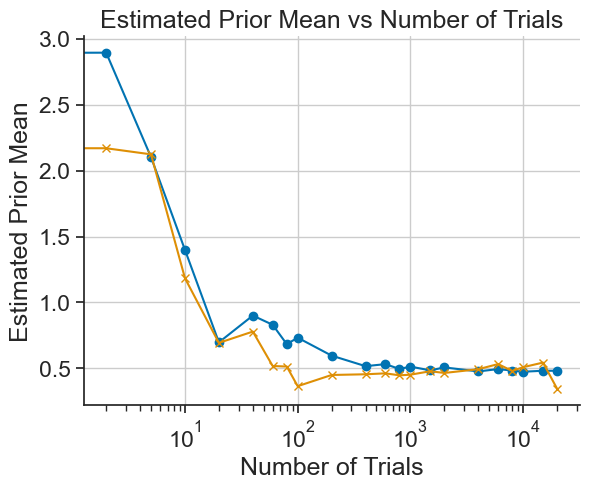

In [22]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

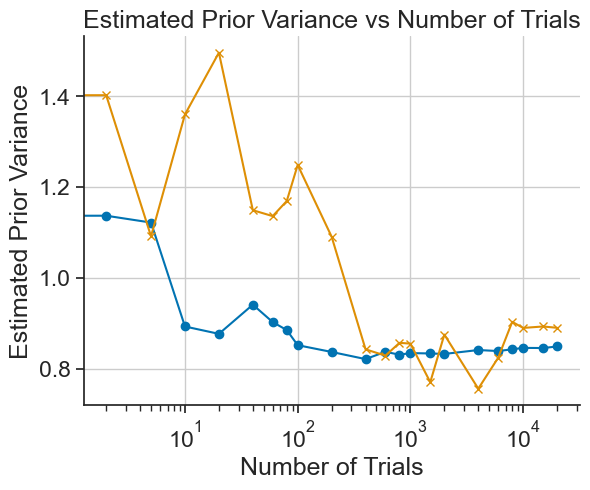

In [ ]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [24]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_EKF_absolute(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_EKF_abs_only = mu_list_agent
sigma_list_EKF_abs_only = sigma_list_agent

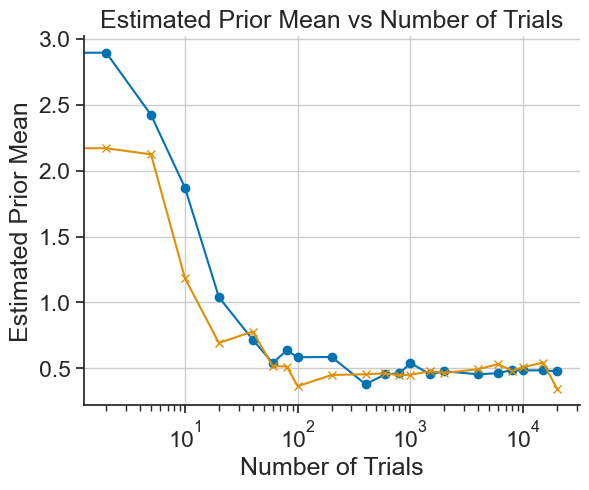

In [25]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

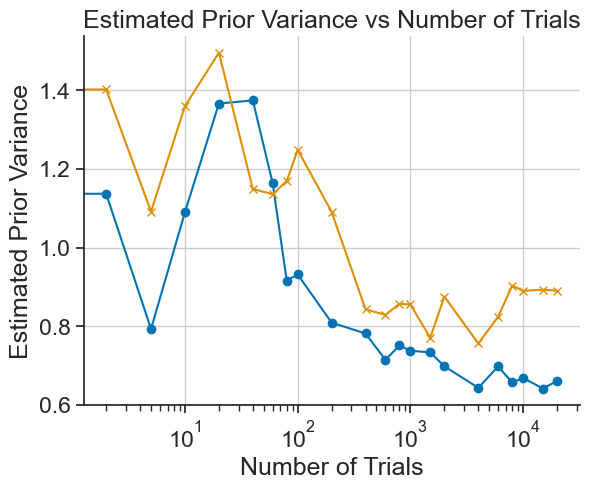

In [26]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

In [33]:
mu_init = mu_list[0]
sigma_init = sigma_list[0]
mu_final = np.mean(mu_list[-13:-1])
sigma_final = np.mean(sigma_list[-5:-1])

internal_std = np.mean(internal_std_list)
measurement_noise = 1.96

agent = BayesianReplica(mu_init, sigma_init, internal_std)

mu_list_agent = []
sigma_list_agent = []
for _ in range(10):
    mu_list_agent_temp = []
    sigma_list_agent_temp = []
    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent_temp.append(mu_prior)
        sigma_list_agent_temp.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise_pure_mean(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_absolute_pure_var(n_trials, mu_final, sigma_final, measurement_noise)
    
    mu_list_agent.append(mu_list_agent_temp)
    sigma_list_agent.append(sigma_list_agent_temp)

mu_list_agent = np.mean(np.array(mu_list_agent), axis=0)
sigma_list_agent = np.mean(np.array(sigma_list_agent), axis=0)

mu_list_KF_EKF_abs = mu_list_agent
sigma_list_KF_EKF_abs = sigma_list_agent

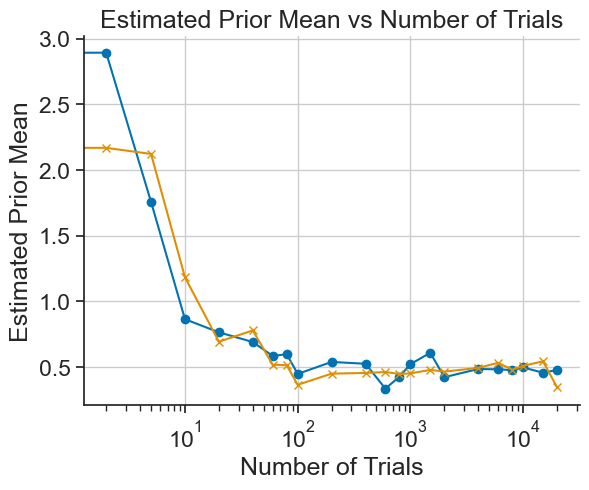

In [34]:
plt.plot(trials, mu_list_agent, marker='o')
plt.plot(trials, mu_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

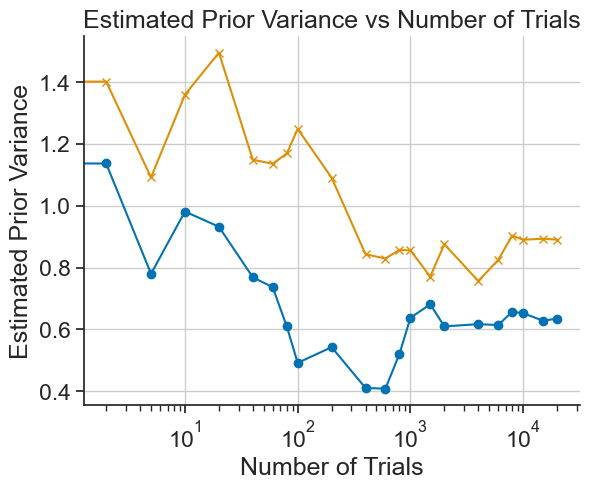

In [35]:
plt.plot(trials, sigma_list_agent, marker='o')
plt.plot(trials, sigma_list, marker='x')
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

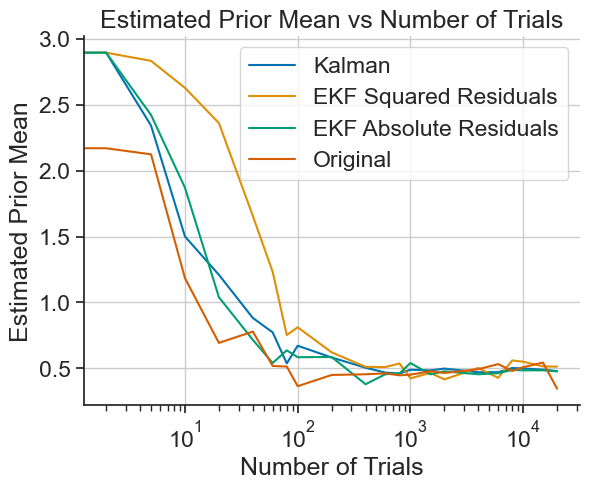

In [36]:
plt.plot(trials, mu_list_kalmann, label='Kalman')
plt.plot(trials, mu_list_EKF_sq_only, label='EKF Squared Residuals')
plt.plot(trials, mu_list_EKF_abs_only, label='EKF Absolute Residuals')
plt.plot(trials, mu_list, label='Original')
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Mean')
plt.title('Estimated Prior Mean vs Number of Trials')
plt.grid(True)
plt.show()

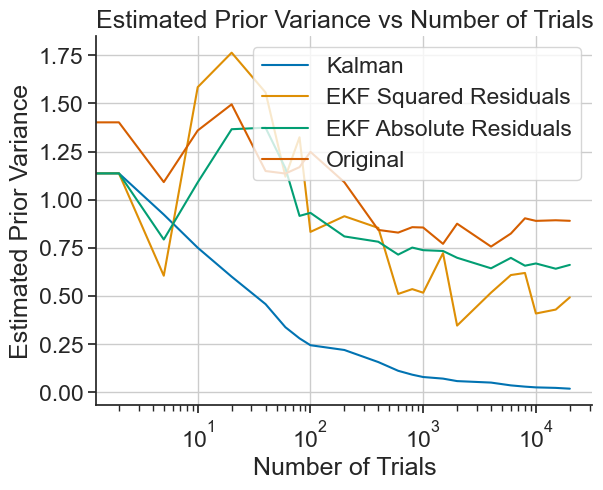

In [37]:
plt.plot(trials, sigma_list_kalmann, label='Kalman')
plt.plot(trials, sigma_list_EKF_sq_only, label='EKF Squared Residuals')
plt.plot(trials, sigma_list_EKF_abs_only, label='EKF Absolute Residuals')
plt.plot(trials, sigma_list, label='Original')
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials')
plt.grid(True)
plt.show()

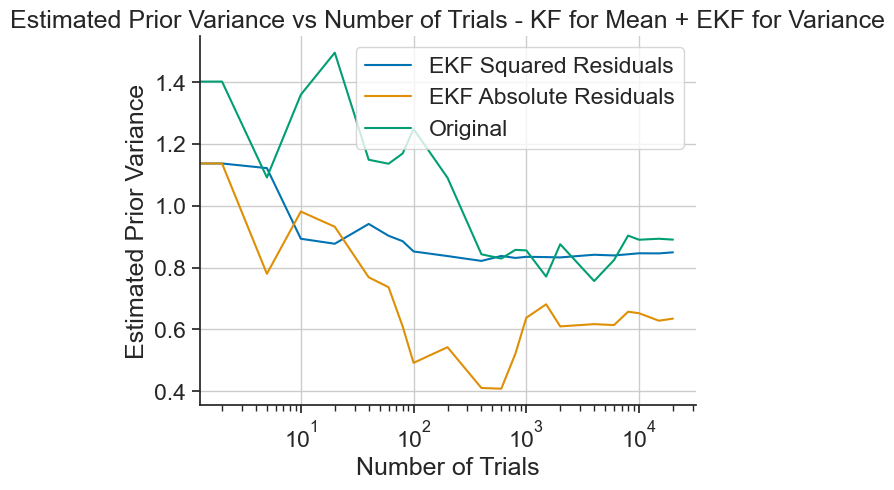

In [38]:
plt.plot(trials, sigma_list_KF_EKF_sq, label='EKF Squared Residuals')
plt.plot(trials, sigma_list_KF_EKF_abs, label='EKF Absolute Residuals')
plt.plot(trials, sigma_list, label='Original')
plt.legend()
plt.xscale('log')
plt.xlabel('Number of Trials')
plt.ylabel('Estimated Prior Variance')
plt.title('Estimated Prior Variance vs Number of Trials - KF for Mean + EKF for Variance')
plt.grid(True)
plt.show()

In [42]:
def mse_confidence_interval(x, y, n_bootstrap=2000, alpha=0.05):
    x = np.asarray(x)
    y = np.asarray(y)
    T = min(len(x), len(y))
    x = x[:T]
    y = y[:T]

    residuals = (x - y) ** 2
    boot_mse = []

    for _ in range(n_bootstrap):
        idx = np.random.choice(T, T, replace=True)
        boot_mse.append(np.mean(residuals[idx]))

    lower = np.percentile(boot_mse, 100 * alpha / 2)
    upper = np.percentile(boot_mse, 100 * (1 - alpha / 2))

    return np.mean(residuals), (lower, upper)


In [43]:
def compare_lists(original, list_dict):
    """
    list_dict: {name: time_series}
    """
    results = {}

    for name, series in list_dict.items():
        mse_val, ci = mse_confidence_interval(original, series)
        results[name] = {
            "mse": mse_val,
            "ci_lower": ci[0],
            "ci_upper": ci[1]
        }

    return results


In [44]:
mu_dict = {
    "Kalman": mu_list_kalmann,
    "EKF Squared Residuals": mu_list_EKF_sq_only,
    "EKF Absolute Residuals": mu_list_EKF_abs_only
}

sigma_dict = {
    "Kalman": sigma_list_kalmann,
    "EKF Squared Residuals - KF Mean": sigma_list_KF_EKF_sq,
    "EKF Absolute Residuals - KF Mean": sigma_list_KF_EKF_abs,
    "EKF Squared Residuals": sigma_list_EKF_sq_only,
    "EKF Absolute Residuals": sigma_list_EKF_abs_only
}

results_mu = compare_lists(mu_list, mu_dict)
results_sigma = compare_lists(sigma_list, sigma_dict)

print("Mean Estimation Results:")
for name, res in results_mu.items():
    print(f"{name}: MSE = {res['mse']:.6f}, 95% CI = [{res['ci_lower']:.6f}, {res['ci_upper']:.6f}]")

print("\nVariance Estimation Results:")
for name, res in results_sigma.items():
    print(f"{name}: MSE = {res['mse']:.6f}, 95% CI = [{res['ci_lower']:.6f}, {res['ci_upper']:.6f}]")

Mean Estimation Results:
Kalman: MSE = 0.266323, 95% CI = [0.021268, 0.719299]
EKF Squared Residuals: MSE = 0.548539, 95% CI = [0.156391, 1.087394]
EKF Absolute Residuals: MSE = 0.275705, 95% CI = [0.018986, 0.722913]

Variance Estimation Results:
Kalman: MSE = 0.611555, 95% CI = [0.504333, 0.710877]
EKF Squared Residuals - KF Mean: MSE = 0.052831, 95% CI = [0.021657, 0.096087]
EKF Absolute Residuals - KF Mean: MSE = 0.147518, 95% CI = [0.097853, 0.206745]
EKF Squared Residuals: MSE = 0.117677, 95% CI = [0.077079, 0.161268]
EKF Absolute Residuals: MSE = 0.048984, 95% CI = [0.031792, 0.070012]


In [ ]:
def mse_diff_ci(true, pred1, pred2, alpha=0.05):
    true = np.asarray(true)
    min_len = min(len(true), len(pred1), len(pred2))

    e1 = (true[:min_len] - pred1[:min_len])**2
    e2 = (true[:min_len] - pred2[:min_len])**2

    diff = e1 - e2
    mean_diff = diff.mean()

    se = diff.std(ddof=1) / np.sqrt(len(diff))
    t = stats.t.ppf(1 - alpha/2, df=len(diff) - 1)

    ci = (mean_diff - t*se, mean_diff + t*se)
    return mean_diff, ci


In [28]:
k_values = np.linspace(1, 100, 20)  # Try 20 values from 1 to 100, adjust range as needed
best_k = None
lowest_mse = float('inf')

for k in k_values:
    agent = BayesianReplica(mu_init, sigma_init, internal_std)
    mu_list_agent = []
    sigma_list_agent = []

    for n_trials in trials:
        mu_prior, sigma_prior = agent.get_prior()
        mu_list_agent.append(mu_prior)
        sigma_list_agent.append(sigma_prior)
        agent.reset_agent()
        agent.train_agent_kalmann_m_noise(n_trials, mu_final, sigma_final, measurement_noise)
        agent.train_agent_EKF_absolute(n_trials, mu_final, sigma_final, measurement_noise, k)

    current_mse = mse(sigma_list, sigma_list_agent)
        
    if current_mse < lowest_mse:
        lowest_mse = current_mse
        best_k = k

print("Best k:", best_k)
print("Lowest MSE:", lowest_mse)


TypeError: BayesianReplica.train_agent_EKF_absolute() takes 5 positional arguments but 6 were given